# Distributions Examples with Python - 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

# Discrete Uniform Distribution

## Problem statement

The number of books sold by a bookseller per day is given in 'bookseller.csv'.

Let

X = Number of books sold by a bookseller per day

X is a Discrete Random variable (because it represents the book count). Let's see the distribution of X and answer the below questions.


1. Find the probability that more than 96 books will be sold on a given day
2. Find the probability that less than 92 books will be sold on a given day

In [2]:
df = pd.read_csv('bookseller.csv')
df.head()

,S.No,Date,Number of Books Sold
0,1,01-01-2020,90
1,2,02-01-2020,100
2,3,03-01-2020,100
3,4,04-01-2020,97
4,5,05-01-2020,93


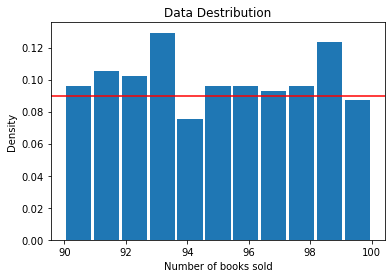

In [3]:
plt.hist(df['Number of Books Sold'], 11, rwidth=0.9, density=True)
plt.axhline(0.09, color='red')
plt.xlabel('Number of books sold')
plt.ylabel('Density')
plt.title('Data Destribution')
plt.show()

**Insight**: As you can see from the above plot that all the values between 90 and 100 are having almost equal probability, you can assume that the number of books sold follows a discrete uniform distribution.

X ~ U(90,100)


In [4]:
from scipy.stats import uniform

k = np.arange(90, 101)
# loc = where it starts
# scale = steps it take beyond (90 - 100 is 11 steps) 
probs = uniform.pdf(k, loc=90, scale=11)
probs

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

**Find the probability that more than 96 books will be sold on a given day**

$ P(X\ > 96)$

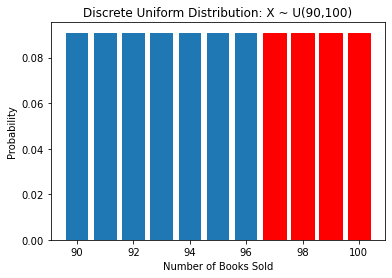

In [5]:
# bar plot of the number of books and it's respective prob
bar1 = plt.bar(k, probs)

for i in range(7,11): # from 97 to the end (more than 96)
    bar1[i].set_color('r')
    
plt.xlabel('Number of Books Sold')
plt.ylabel('Probability')
plt.title('Discrete Uniform Distribution: X ~ U(90,100)')
plt.show()

In [6]:
# from the begining to 96
uniform.cdf(97, loc=90, scale=11)

# from 96 to the end
1 - uniform.cdf(97, loc=90, scale=11)

0.36363636363636365

**Find the probability that less than 92 books will be sold on a given day**


$ P(X\ < 92) $

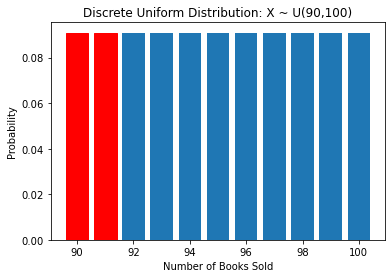

In [7]:
bar2 = plt.bar(k, probs)

for i in range(0, 2):
    bar2[i].set_color('r')
    
plt.xlabel('Number of Books Sold')
plt.ylabel('Probability')
plt.title('Discrete Uniform Distribution: X ~ U(90,100)')
plt.show()

In [8]:
uniform.cdf(92, loc=90, scale=11)

0.18181818181818182

### Conclusion:

There is a 36.36% chance that more than 96 books will be sold on a given day.

There is a 18% chance that less than 92 books will be sold on a given day.

# Continuos Uniform Distribution

### Problem statement


 IT industry records the amount of time a software engineer needs to fix a  bug in the initial phase of software development in 'debugging.csv'.

Let

X = Time needed to fix bugs


X is a continuous random variable. Let's see the distribution of X and answer the below questions.


1. Find the probability that a randomly selected software debugging requires less than three hours

2. Find the probability that a randomly selected software debugging requires more than two hours

3. Find the 50th percentile of the software debugging time


In [9]:
df = pd.read_csv('debugging.csv')
df.head()

,Bug ID,Time Taken to fix the bug
0,12986,2.42
1,12987,2.03
2,12988,2.74
3,12989,3.21
4,12990,3.40


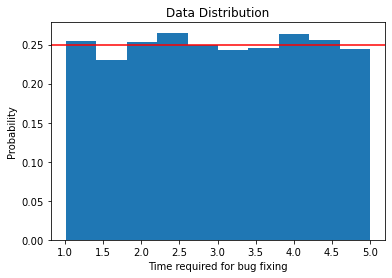

In [10]:
plt.hist(df['Time Taken to fix the bug'], density=True)

plt.axhline(0.25, color='red')
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Data Distribution")

plt.show()

Another way to recognize a uniform distribution in your data is to look at a density plot. We will use displot of seaborn library to visualize the distribution of time needed for bug fixing.

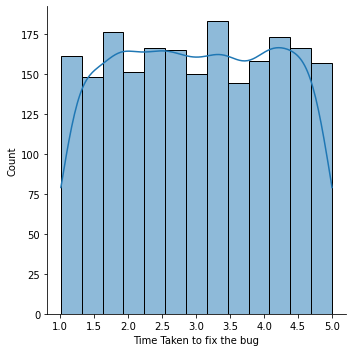

In [11]:
sns.displot(df['Time Taken to fix the bug'], kde=True)
plt.show()

**Insight**: As you can see from the above plot that all the values between 1 and 5 are having almost equal probability, we are going to use continuous uniform distribution. We need to decide the endpoints. Here, endpoints are 1 and 5.

X ~ U(1, 5)

In [12]:
from scipy.stats import uniform

x = np.linspace(1, 5, 50)
probs = uniform.pdf(x, loc=1, scale=4)
probs

array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

**Find the probability that a randomly selected software debugging requires a maximum time of 3 hours** 

**CDF:** of a random variable (X) is the probability that X  will take the value less than or equal to x. It can be represented mathematically as below.

>$F_X(x) = P(X\leq x)$


In our case, random variable (X) is the number of hours.

$ P(X\leq 3)$

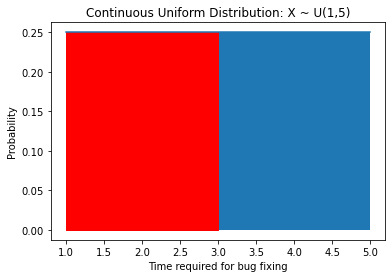

In [13]:
x1 = np.linspace(1, 3, 25)
plt.plot(x, probs)

plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color='r')

plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

In [14]:
uniform.cdf(x=3, loc=1, scale=4)

0.5


**Find the probability that a randomly selected software bug fixing requires more than two hours.**

$ P(X>2)$

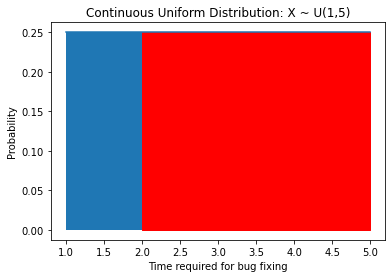

In [15]:
x1 = np.linspace(2, 5, 20)
plt.plot(x, probs)

plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color="r")

plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

In [16]:
1 - uniform.cdf(x=2, loc=1, scale=4)

0.75

**Let's calculate the 50th percentile of software debugging time.**

ppf(): It is used to calculate the percentile point given probability. It works opposite of cdf()

In [17]:
# What's the number of yours wich there's a 50% chance of being 
# less than that number of yours (q=chance)
uniform.ppf(q=0.5, loc=1, scale=4)

3.0

### Conclusion:  

There is a 50% chance that a randomly selected software debugging requires less than three hours.

There is a 75% chance that a randomly selected software debugging requires more than two hours.

The 50th percentile of the software debugging time is 3 hours.